## Week 3

### Exercise:

- Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)
- Download the data of your choice.
- Practice data cleaning and preprocessing, handle missing values, outliers etc.
- Explore the basic statistics with pandas methods.
- Create visualizations to understand the distribution of variables.
- Identify correlations between variables using correlation matrices and/or heatmaps.
- Derive insights from your analysis. What interesting patterns or trends did you discover?

### Notes:
- The goal is to gain insights into the data and present your findings through meaningful visualizations.
- Document your analysis and include code comments to explain each step of the analysis.
- Create visualizations with clear labels and titles.
- Summarize your findings in a informative manner.


### Solution:

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

In [19]:
# added data-diabets relationship other symptom-
df=pd.read_csv('C:/Users/yldrm/Desktop/gayesu/Data/diabetes.csv')

In [20]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
# 0 convert to NaN columns then replace 
zero = ["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]

for col in zero:
    df[col] = df[col].replace(0,np.NaN)
    mean = df[col].mean(skipna=True)
    df[col] = df[col].replace(np.NaN,mean)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


([<matplotlib.patches.Wedge at 0x247b39d9110>,
 [Text(-0.5025943242672991, 0.9784676515931925, '1'),
  Text(0.5025944158780503, -0.9784676045369114, '0')])

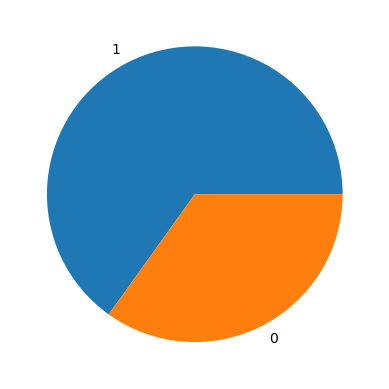

In [44]:
diabet_count=df['Outcome'].value_counts()
labels = '1', '0'

fig, ax = plt.subplots()
ax.pie(diabet_count, labels=labels)

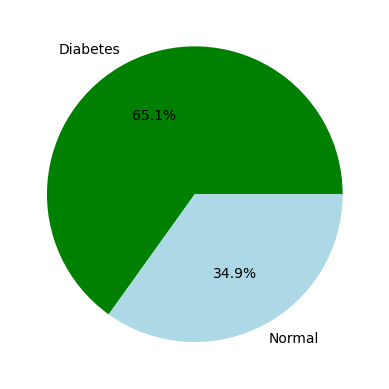

In [45]:
plt.pie(diabet_count.values,labels=["Diabetes","Normal"],autopct="%1.1f%%",colors=["green", "lightblue"])

plt.show()

In [46]:
df_1=df[df["Outcome"]==1] #having diabetes 
df_1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,29.15342,155.548223,36.3,0.258,52,1
759,6,190.0,92.0,29.15342,155.548223,35.5,0.278,66,1
761,9,170.0,74.0,31.00000,155.548223,44.0,0.403,43,1


In [32]:
df_1=df[df["Outcome"]==1] #having diabetes 
df_1



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,29.15342,155.548223,36.3,0.258,52,1
759,6,190.0,92.0,29.15342,155.548223,35.5,0.278,66,1
761,9,170.0,74.0,31.00000,155.548223,44.0,0.403,43,1


<Axes: xlabel='Age', ylabel='Count'>

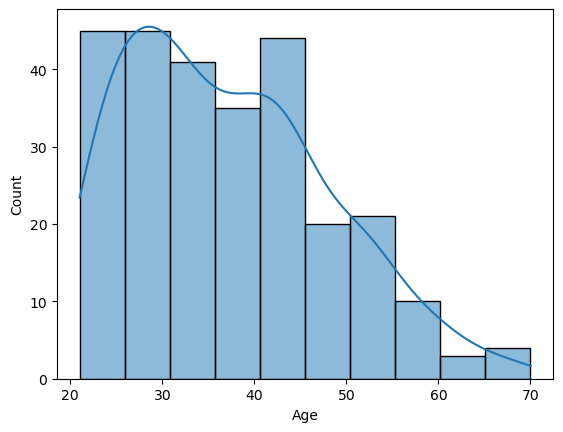

In [47]:
sns.histplot(data=df_1, x='Age', kde=True) # having diabetes age


In [48]:
df_1.corr()
df_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,29.15342,155.548223,36.3,0.258,52,1
759,6,190.0,92.0,29.15342,155.548223,35.5,0.278,66,1
761,9,170.0,74.0,31.00000,155.548223,44.0,0.403,43,1


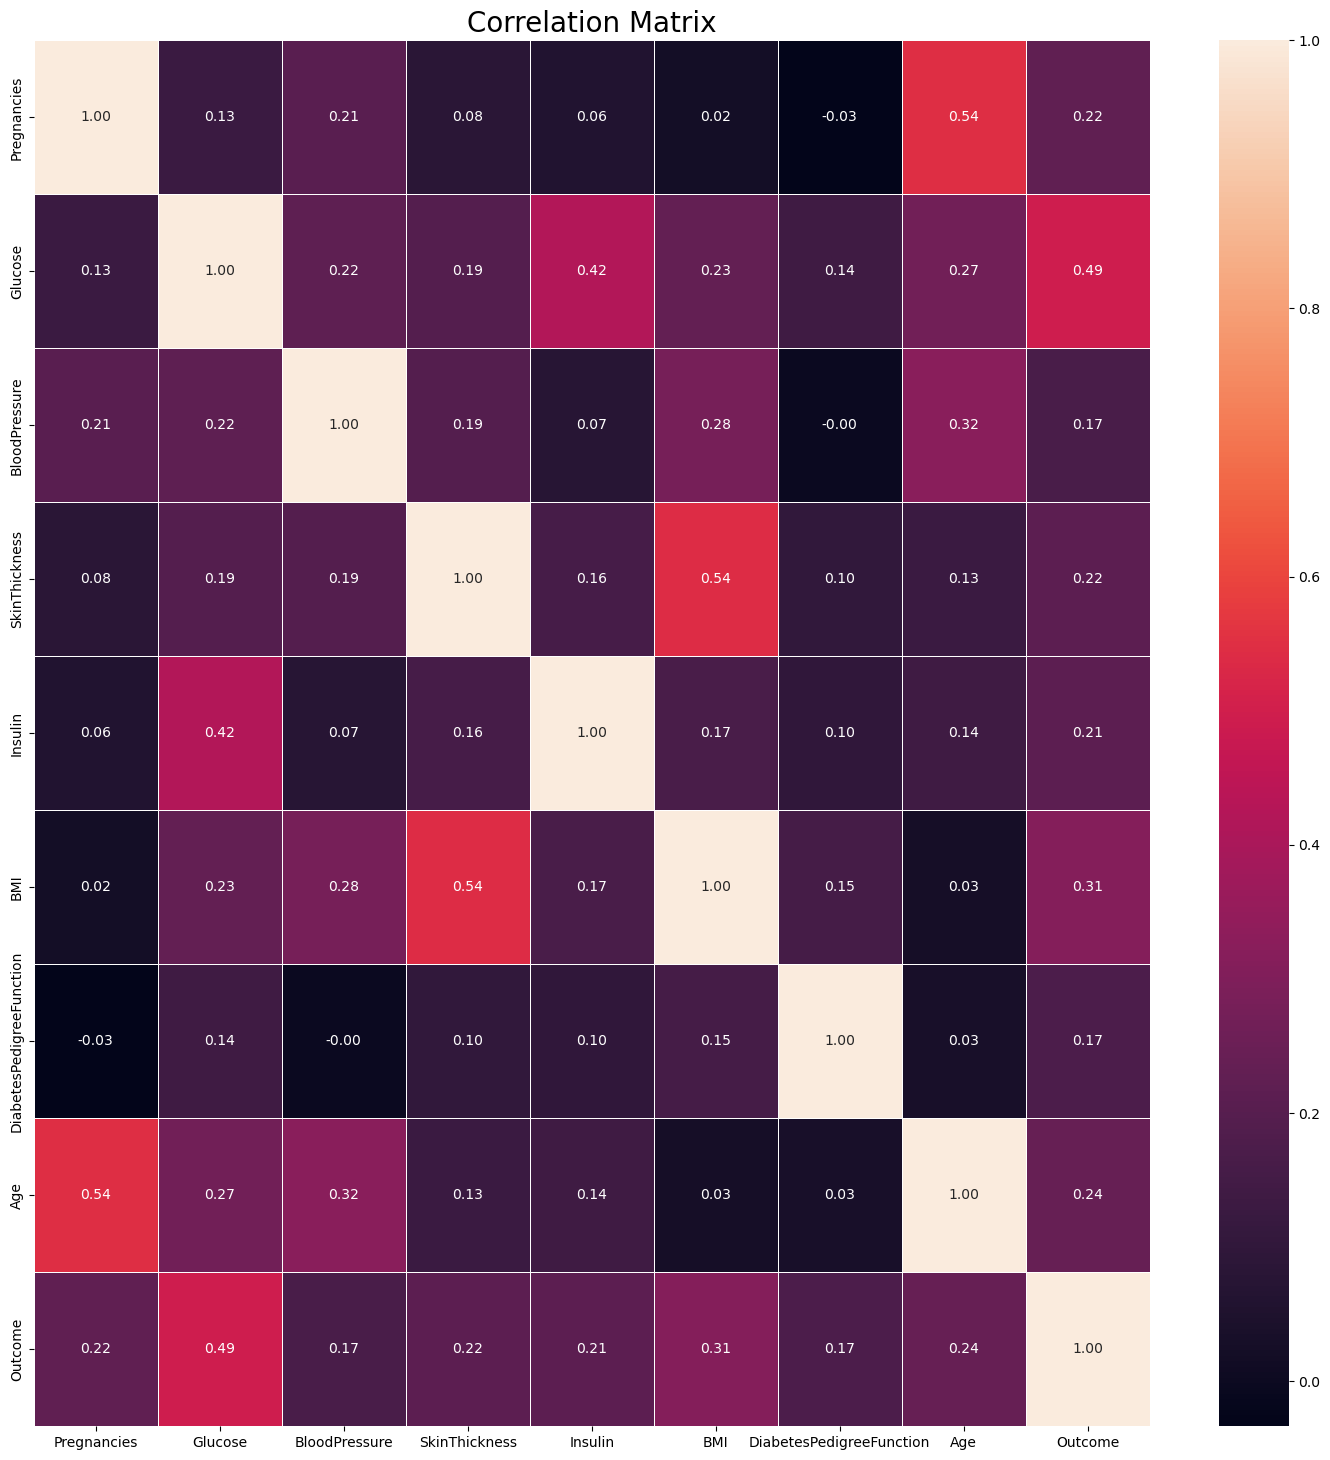

In [49]:
f, ax = plt.subplots(figsize=[18, 18])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, linewidths=.5)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()